Notebook adapted from and inspired by [Dr. Vijay Raghavan](https://github.com/vijaygwu) and the textbook [Generative Deep Learning: Teaching Machines To Paint, Write, Compose, and Play](https://www.amazon.com/Generative-Deep-Learning-Teaching-Machines/dp/1098134184/ref=pd_lpo_sccl_1/130-9125606-0943241?pd_rd_w=YirpH&content-id=amzn1.sym.4c8c52db-06f8-4e42-8e56-912796f2ea6c&pf_rd_p=4c8c52db-06f8-4e42-8e56-912796f2ea6c&pf_rd_r=3VZV23RSTHJKQM1HQEH4&pd_rd_wg=28A2g&pd_rd_r=e4cc376c-256b-47be-acff-8e87fa2b11e8&pd_rd_i=1098134184&psc=1)

## Latent Space in Generative AI

In the world of generative AI, a latent space refers to an abstract, compressed representation of data. Imagine you’re trying to describe a complex image, like a photo of a forest. Instead of storing every pixel’s color and position, you want to simplify it. A latent space is where this simplified or compressed version of the image lives. The beauty of this space is that, although it’s less detailed, it still contains the essential information needed to recreate or understand the image. This is a core idea of deep learning and it is driving many of the breakthroughs we see in AI today!

In generative models, this latent space allows the AI to explore relationships between different data points. For instance, by moving through the latent space, a model can gradually change one image into another — like turning a forest into a beach by shifting through small, meaningful changes. It’s this ability to explore and manipulate the latent space that makes generative AI so powerful. The model "learns" the essential features of the data and can use them to generate new, similar instances.

When we talk about generative AI, we are talking about models that are `probabalistic`, not deterministic. This means that there is a random component to how they generate data. When you use a generative model, you will not get the same output every time.

##Autoencoders and Their Role in AI

An autoencoder is a type of neural network that is often used to understand and compress data, and it’s a key building block in AI. The structure of an autoencoder is simple: it has two main parts — an encoder and a decoder.

- The encoder compresses the input data into a smaller, more efficient format, called the latent space. This is like taking a large image and distilling it, preserving its important features.

- The decoder takes that compressed version and attempts to reconstruct its original form. The goal is to recreate the original input as closely as possible.

Autoencoders are significant because they allow AI systems to learn efficient representations of data without needing labels. They can discover hidden patterns and structures within the data, which is crucial for tasks like image compression, anomaly detection, and even creating new data, like generating realistic images. They map each data point to a location in the latent space.

One downside to this mapping, however, is that points close to each other can lead to generated images that vary drastically, since the data is mapped to a point and the lower dimensional latent space can be filled up with various points. That is one of the main things the Variational Autoencoder (VAE) is meant to address. I'll cover those in a different notebook.

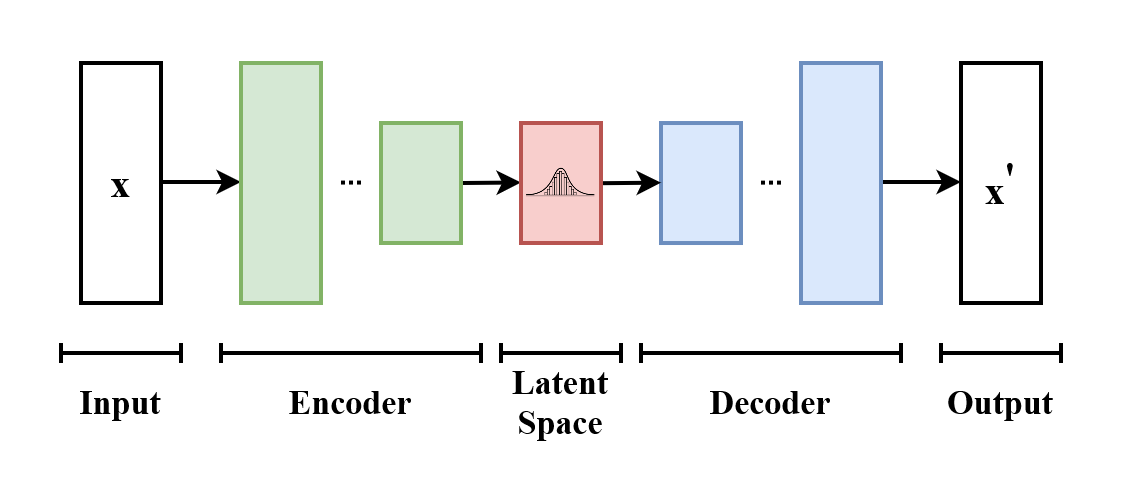

*Image taken from [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:VAE_Basic.png). It is an image about a VAE, but the general concept is still applicable.*

*License information [here](https://creativecommons.org/licenses/by-sa/4.0/).*

In [ ]:
# PyTorch library for tensors and neural networks
import torch

# neural network module from PyTorch
import torch.nn as nn

# torchvision, a package that provides access to popular datasets,
# model architectures, and transforms
import torchvision

# transforms module for data augmentation and preprocessing
import torchvision.transforms as transforms

# Import the MNIST dataset
from torchvision.datasets import MNIST

# DataLoader to handle batching, shuffling, and loading data in
# parallel during training
from torch.utils.data import DataLoader

# Import utility functions for visualizing tensors as grids of images
import torchvision.utils as vutils

# Import GradScaler and autocast for mixed-precision training.
# These help improve performance by allowing
# certain computations to be performed in half-precision (float16) while
# maintaining accuracy with full precision (float32)
from torch.cuda.amp import GradScaler, autocast


import matplotlib.pyplot as plt # Plotting
import numpy as np # Numerical operations

In [ ]:
# Subclassing new Autoencoder class from Module
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        # Inherit from Module class
        super(Autoencoder, self).__init__()

        # Encoder: compresses the image into a lower-dimensional latent space
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),  # Flatten the image & resize
            nn.ReLU(True),  # Add ReLU to prev layer
            nn.BatchNorm1d(128),  # Batch normalization for stability
            nn.Linear(128, encoding_dim),  # Linear transformation to the encoding dimension
        )

        # Decoder: reconstructs the image from the latent space
        # Notice how it mirrors encoder!
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),  # Linearly transforms the encoding
            nn.ReLU(True),
            nn.BatchNorm1d(128),
            nn.Linear(128, 28 * 28),  # Transforms back to original image shape
            nn.Sigmoid()  # [0,1]
        )

    # Forward pass
    def forward(self, x):
        # Normalize the input and flatten the image
        x = self.encoder(x.view(-1, 28*28))  # Encode the input image

        x = self.decoder(x)  # Decode the encoded image

        return x.view(-1, 1, 28, 28)  # Reshape to the original image dimensions

In [ ]:
def imshow(img):
    """
    Display an image after unnormalizing it and converting it to a numpy array.
    """
    # Move the image to the CPU and unnormalize it by reversing normalization
    img = img.cpu() * 0.5 + 0.5

    # Convert the PyTorch tensor to a numpy array for visualization
    npimg = img.numpy()

    # Reshape the array to have channels as the last dimension
    # np.transpose(npimg, (1, 2, 0)) changes the dimensions from
    # (channels, height, width) to (height, width, channels)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

    # Display the image using matplotlib's show function
    plt.show()

In [ ]:
# Define a sequence of transformations to be applied to the images
transform = transforms.Compose([

    # Convert the input image to a PyTorch tensor
    transforms.ToTensor(),

    # Normalize the tensor values.
    # The mean is 0.5 and the standard deviation is 0.5.
    # Does this for each channel
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
# Load MNIST data
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:11<00:00, 898904.46it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134464.78it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1273821.24it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4479315.49it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Check if a GPU is available; if so, use it, otherwise use the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the Autoencoder model with an encoding dimension of 64 and
# move it to the chosen device
model = Autoencoder(encoding_dim=64).to(device)

# Define the loss function: Mean Squared Error (MSE), which is commonly used
criterion = nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# Define the number of epochs
NUM_EPOCHS = 10

# Initialize the gradient scaler for mixed precision training,
# which helps to speed up training on GPUs
scaler = torch.amp.GradScaler('cuda')

# Loop through the epochs
for epoch in range(NUM_EPOCHS):

    # Loop through batches of data from the DataLoader
    for data in train_loader:

        # Unpack the data
        img, _ = data

        # Move the image to the appropriate device
        img = img.to(device)

        # Use autocast for mixed precision to perform certain operations in
        # float16 to improve efficiency
        with torch.amp.autocast('cuda'):

            # Forward pass: get the output (reconstructed image) from the model
            output = model(img)

            # Calculate the loss between the output (reconstructed image) and
            # the input image using MSE
            loss = criterion(output, img)

        # Zero the parameter gradients to avoid accumulation from
        # previous batches
        optimizer.zero_grad()

        # Backward pass: scale the loss for mixed precision
        # and compute gradients
        scaler.scale(loss).backward()

        # Update the model's weights based on the gradients
        scaler.step(optimizer)

        # Update the scaler for the next iteration to ensure stability in
        # mixed precision training
        scaler.update()

    # Print out the epoch number and the loss for tracking the model's progress
    print('Epoch [{}/{}], Loss:{:.4f}'.format(epoch+1,
                                              NUM_EPOCHS,
                                              loss.item()))

Epoch [1/10], Loss:0.8448
Epoch [2/10], Loss:0.8392
Epoch [3/10], Loss:0.8382
Epoch [4/10], Loss:0.8500
Epoch [5/10], Loss:0.8475
Epoch [6/10], Loss:0.8460
Epoch [7/10], Loss:0.8430
Epoch [8/10], Loss:0.8544
Epoch [9/10], Loss:0.8387
Epoch [10/10], Loss:0.8418


Original Images


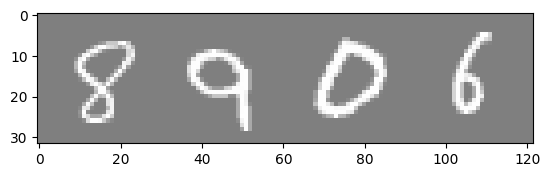

Reconstructed Images


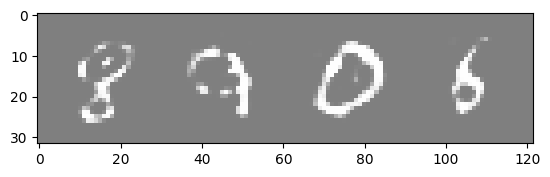


Latent space representations:
tensor([[ -9.3189,  -0.3472,  -3.2481,   4.6014,  -0.7284,  -5.8821,  -8.8507,
          -7.7275,  -2.9108,   5.3468,  -1.3511,   4.6721,  -2.5003,  -9.7230,
           3.2158,   2.7902,  -7.3503,  -3.1364,  -1.2391,  -3.1756,   1.7600,
          -4.4270,  -1.2235,  -2.8473,  -2.3127,  -1.5211,  -0.3111,   1.7355,
          -4.3956,   3.6915,   4.5771,  -7.0711,   0.3000,   7.9280,  -7.1230,
           5.0284,  -7.0300,  -1.9327,   2.3975,  -1.6191,   1.7908,  -4.5305,
           6.1035,   4.0885,  11.5211,   2.1112,   1.6243,  -3.2520,  -1.7051,
          -7.7427,  -5.0122,  -1.5598,   5.5810,  -5.1376,   7.1137,  -3.5409,
          -3.6454,   6.5979,  -4.9371,  -4.7615,   2.5729,  -2.0999,   2.9454,
           1.7502],
        [ -7.6686,  -2.6784,  -3.6780,   4.3714,  -1.7537,  -5.1563,  -9.8795,
          -6.0456,  -2.8225,   4.4966,  -5.0712,   9.2786,  -4.4289,  -8.5796,
           6.6033,   1.9354,  -7.1691,  -4.5324,   0.9835,  -3.1017,   2.1839,
 

In [ ]:
# Get a batch of images from the train_loader for visualization
dataiter = iter(train_loader)

images, _ = next(dataiter)  # Extract the images from the first batch

images = images.to(device)  # Move the images to the device

# Display the original images using the imshow function
print("Original Images")

# Display the first 4 images from the batch, normalize for better visualization
imshow(vutils.make_grid(images[:4], normalize=True))

# Disable gradient computation for efficiency
# during the encoding and decoding process (we're not training)
with torch.no_grad():
    # Encode the first 4 images by flattening and passing them through
    # the encoder
    encoded_imgs = model.encoder(images.view(-1, 28*28)[:4])

    # Decode the latent representations to get the reconstructed images
    # Reshape back to (batch_size, channels, height, width)
    decoded_imgs = model.decoder(encoded_imgs).view(-1, 1, 28, 28)

# Display the reconstructed images
print("Reconstructed Images")
imshow(vutils.make_grid(decoded_imgs, normalize=True))

# Spacing
print()

# Print the latent space representations (encoded images)
print("Latent space representations:")
print(encoded_imgs)

## Visualize the Latent Space

To get a better understanding of how the latent space is constructed, lets visualize it! You can project the high-dimensional latent space into 2D (or 3D) using Principal Component Analysis (PCA) or t-SNE (t-Distributed Stochastic Neighbor Embedding), which are dimensionality reduction techniques.

**Steps to Visualize Latent Space:**
- Encode a batch of images into the latent space.
- Apply PCA or t-SNE to reduce the dimensionality of the latent vectors to 2D (or 3D).
- Plot the 2D (or 3D) latent space and color each point according to its label (or reconstructed quality).

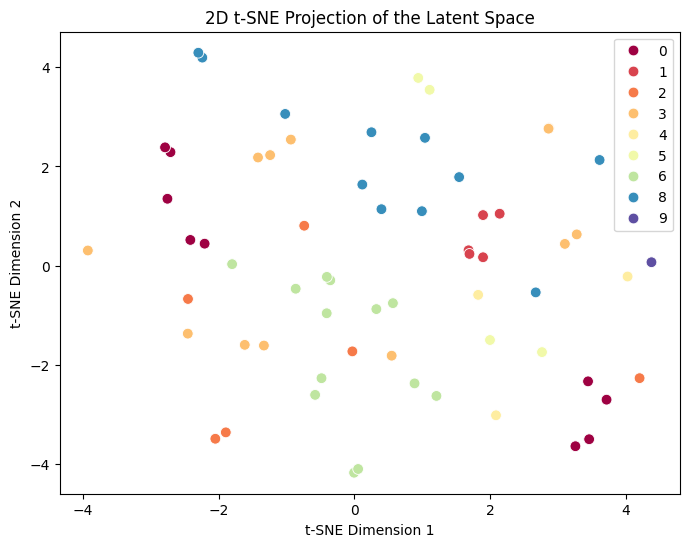

In [ ]:
# We'll use t-SNE for our example
from sklearn.manifold import TSNE
import seaborn as sns

# Get a batch of images and their corresponding labels
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.to(device) # Send images to device

# Encode the images into the latent space
with torch.no_grad():
    encoded_imgs = model.encoder(images.view(-1, 28*28))

# Convert imgs & labs to numpy for visualization
encoded_imgs_np = encoded_imgs.cpu().numpy()
labels_np = labels.cpu().numpy()

# Use t-SNE to reduce the latent space to 2D for visualization
# Random seed for reproducibility
tsne = TSNE(n_components=2, random_state=42)
# fit_transform will fit and transform the data in one method call!
latent_2d = tsne.fit_transform(encoded_imgs_np)

# Plot the 2D latent space with color-coded labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=latent_2d[:, 0], y=latent_2d[:, 1],
                hue=labels_np,
                palette = 'Spectral', legend='full', s=60)

# Plot beautify
plt.title('2D t-SNE Projection of the Latent Space')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(loc='best')
plt.show()

## Understanding the t-SNE Projection of the Latent Space

The plot above shows a 2D t-SNE projection of the latent space representations of images from the dataset. Here’s a breakdown of the key ideas:

**Latent Space Representation:**

Each point on the plot corresponds to an image from the dataset that has been encoded by the autoencoder into the latent space. This space captures the essential features of the image, reducing its dimensionality while retaining the most important information.

**t-SNE (t-Distributed Stochastic Neighbor Embedding):**

t-SNE is a dimensionality reduction technique that projects the high-dimensional latent space representations into two dimensions for visualization. It attempts to maintain the relative distances between data points, so images that are similar in the latent space are placed close together in the 2D plot.

**Clusters and Class Labels:**

Each point is colored based on the actual class label of the image (digits in this case). Ideally, images belonging to the same class (e.g., digit "0", "1", etc.) should cluster together if the autoencoder has learned meaningful latent representations. In the plot, you can observe that certain digits (like "0" and "8") have more tightly clustered points, indicating that their features in the latent space are closely related.

Overall, we see that the plot does a fairly decent job of keeping the clusters from overlapping too much. Whenever you compress something down to just 2D, however, it's important to note that it is hard to maintain perfect separation!

**Interpreting the Plot:**

Points that are closer to each other in this 2D plot represent images that share more similarities in the latent space, suggesting the model has learned to group similar images.

The degree of separation or overlap between clusters can give insights into how well the model is differentiating between the different classes. For example, if points for two digits overlap significantly, it may indicate that the model finds those digits more difficult to distinguish.

**Significance of Latent Space:**

The latent space serves as a distillation of the data, which can be used for a variety of tasks, including reconstruction (as with autoencoders), generation of new data, and other downstream tasks, such as classification or clustering.